In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [2]:
# Load dataset
fdf = pd.read_csv('bank-full.csv')

In [3]:
# a) Vizualizarea datelor
print("Primele 5 rânduri din dataset:")
print(fdf.head())

# b) Vizualizarea statisticilor descriptive
print("\nStatistici descriptive:")
print(fdf.describe())

# c) Tratarea valorilor lipsă
print("\nNumărul de valori lipsă pe coloană:")
print(fdf.isnull().sum())

Primele 5 rânduri din dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Statistici descriptive:
                age        balance           day      d

In [4]:
# Encode categorical variables
label_encoders = {}
for column in fdf.select_dtypes(include=['object']).columns:
    if column != 'y':  
        le = LabelEncoder()
        fdf[column] = le.fit_transform(fdf[column])
        label_encoders[column] = le

# Encode target variable
fdf['y'] = fdf['y'].map({'yes': 1, 'no': 0})

In [5]:
# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(fdf.drop(columns=['y']))
fdf['anomaly'] = outliers

# Removing anomalies
fdf = fdf[fdf['anomaly'] == 1].drop(columns=['anomaly'])

In [6]:
# Împărțirea setului de date în train și test
X_train, X_test, y_train, y_test = train_test_split(fdf.drop(columns=['y']), fdf['y'], test_size=0.2, random_state=42)

# Standardizarea caracteristicilor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicarea PCA pentru reducerea la 2 componente
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [7]:
# Aplicarea PCA pentru reducerea la 2 componente
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Clustering cu KMeans
def train_kmeans(X):
    model = KMeans(n_clusters=3, random_state=42)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    return labels, score

kmeans_labels, kmeans_score = train_kmeans(X_train_pca)


# Clustering cu DBSCAN
def train_dbscan(X):
    model = DBSCAN(eps=0.5, min_samples=5)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
    return labels, score

dbscan_labels, dbscan_score = train_dbscan(X_train_pca)






C:\Users\Mihai\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Mihai\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Mihai\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Mihai\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Mihai\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

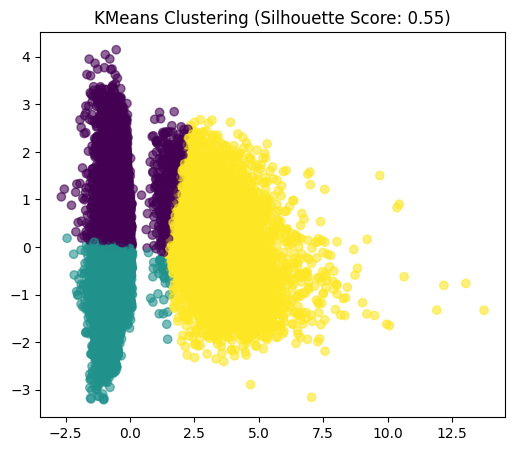

In [8]:
plt.figure(figsize=(6,5))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title(f"KMeans Clustering (Silhouette Score: {kmeans_score:.2f})")
plt.show()

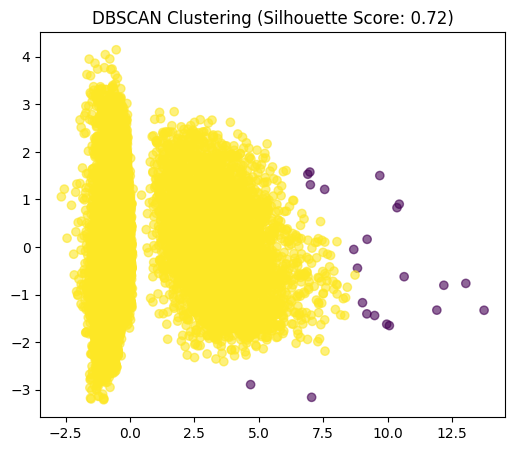

In [9]:
plt.figure(figsize=(6,5))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6)
plt.title(f"DBSCAN Clustering (Silhouette Score: {dbscan_score:.2f})")
plt.show()

In [10]:
# Compararea modelelor
print(f"Silhouette Score KMeans: {kmeans_score:.2f}")
print(f"Silhouette Score DBSCAN: {dbscan_score:.2f}")

Silhouette Score KMeans: 0.55
Silhouette Score DBSCAN: 0.72
